### Домашнее задание <a class="anchor" id="hw"></a><center>

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [19]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
# X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [21]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [22]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [23]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [24]:
k = 100

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.500
Точность алгоритма на тесте при k = 100: 0.467


**1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.**

In [25]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

**От номера соседа $i$ веса можно определять как:**

### - $w(i) = q^{i}$,   $q \in (0,1)$;

In [26]:
def weights_n_neighbor(i, d):
    q = 0.6
    return q ** i

In [27]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.983
Точность алгоритма на тесте при k = 100: 0.967


### - $w(i) = \frac{1}{i}$;

In [28]:
def weights_n_neighbor(i, d):
    return 1 / (i + 1)

In [29]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.992
Точность алгоритма на тесте при k = 100: 0.967


**От расстояния $d$ веса можно определять как:**

### - $w(d) = q^{d}$,   $q \in (0,1)$;

In [30]:
def weights_n_neighbor(i, d):
    q = 0.2
    return q ** d

In [31]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.958
Точность алгоритма на тесте при k = 100: 0.967


### - $w(d) = \frac{1}{d+a}$,

In [32]:
def weights_n_neighbor(i, d):
    return 1 / (d + 0.1)

In [33]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 1.000
Точность алгоритма на тесте при k = 100: 0.967


**3. * Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).**

In [34]:
X = np.vstack([X, X])
y = np.hstack([y, y])
X.shape, y.shape

((300, 4), (300,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [36]:
# два цикла
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [37]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

CPU times: user 576 ms, sys: 1.33 ms, total: 578 ms
Wall time: 583 ms
CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 153 ms
Точность алгоритма на трейне при k = 10: 0.975
Точность алгоритма на тесте при k = 10: 0.933


Один цикл

In [38]:
distance = np.sqrt(np.sum(np.square(X_test[0] - X_train), axis=1))
distance.shape

(240,)

In [39]:
np.c_[distance, y_train]

array([[3.49428104, 0.        ],
       [3.48425028, 0.        ],
       [0.84261498, 1.        ],
       [3.89230009, 0.        ],
       [2.73495887, 2.        ],
       [1.06301458, 2.        ],
       [0.64031242, 1.        ],
       [0.6244998 , 1.        ],
       [3.60277671, 0.        ],
       [3.24037035, 0.        ],
       [1.64316767, 2.        ],
       [0.9       , 2.        ],
       [3.64828727, 0.        ],
       [2.96984848, 2.        ],
       [3.78549865, 0.        ],
       [0.51961524, 1.        ],
       [0.93808315, 2.        ],
       [2.37065392, 2.        ],
       [1.49666295, 2.        ],
       [1.83575598, 2.        ],
       [3.56791255, 0.        ],
       [0.71414284, 1.        ],
       [3.22800248, 0.        ],
       [0.71414284, 1.        ],
       [3.52420204, 0.        ],
       [0.86023253, 2.        ],
       [1.53948043, 2.        ],
       [0.77459667, 1.        ],
       [3.89230009, 0.        ],
       [4.12431813, 0.        ],
       [1.

In [40]:
# один цикл
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
            
#         for i in range(len(x_train)):
            
        # расчет расстояний от классифицируемого объекта до
        # объектов обучающей выборки
        distances = np.sqrt(np.sum(np.square(x - x_train), axis=1))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
#         test_distances = [(dist, label) for dist, label in zip(distances, y_train)]
#         for d in sorted(test_distances)[0:k]:
#             classes[d[1]] += 1
            
            
        # больше оптимизации
        test_distances = np.c_[distances, y_train]
        for d in sorted(test_distances, key=lambda x: x[0])[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [41]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

CPU times: user 73.5 ms, sys: 959 µs, total: 74.5 ms
Wall time: 75.1 ms
CPU times: user 21.2 ms, sys: 980 µs, total: 22.2 ms
Wall time: 22.8 ms
Точность алгоритма на трейне при k = 10: 0.975
Точность алгоритма на тесте при k = 10: 0.933


In [42]:
%timeit [(dist, label) for dist, label in zip(distance, y_train)]

10000 loops, best of 5: 65.5 µs per loop


In [43]:
%timeit np.c_[distance, y_train]

The slowest run took 15.85 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 25.2 µs per loop


Ноль циклов

In [44]:
np.sqrt(np.sum(np.square(X_test[:, np.newaxis] - X_train), axis=2)).shape

(60, 240)

In [45]:
np.sqrt(np.sum(np.square(X_test[:, np.newaxis] - X_train), axis=2)).shape

(60, 240)

In [46]:
# ноль циклов
def knn(x_train, y_train, x_test, k, weights=None):
    
    # расчет расстояний от классифицируемых объектов до
    # объектов обучающей выборки
    distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
    answers = []    
    for distance in distances:
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [47]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

CPU times: user 52.2 ms, sys: 1.97 ms, total: 54.2 ms
Wall time: 54.8 ms
CPU times: user 14.1 ms, sys: 0 ns, total: 14.1 ms
Wall time: 13.4 ms
Точность алгоритма на трейне при k = 10: 0.975
Точность алгоритма на тесте при k = 10: 0.933


Сравним время подсчета расстояний

In [48]:
%%timeit
for x in X_test:
    distances = np.sqrt(np.sum(np.square(x - X_train), axis=1))

1000 loops, best of 5: 1.15 ms per loop


In [49]:
%%timeit
np.sqrt(np.sum(np.square(X_test[:, np.newaxis] - X_train), axis=2))

1000 loops, best of 5: 1.08 ms per loop


**2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

In [50]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

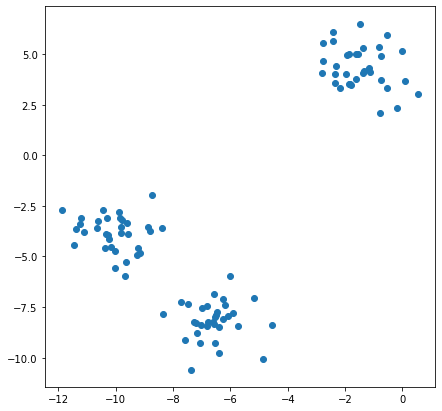

In [51]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [52]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

Напишем функцию для визуализации кластеров

In [53]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y', 'black', 'gray', 'purple', 'brown', 'navy']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [54]:
# определим максимальное количество итераций
max_iterations = 5

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Проверим результат алгоритма после одной итерации

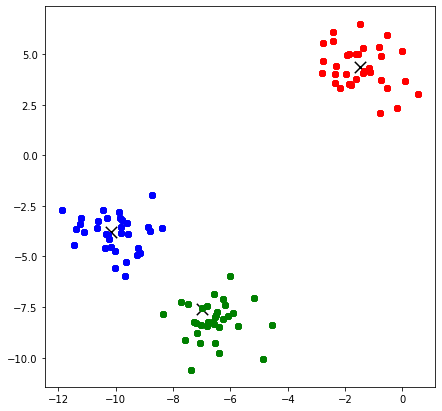

In [55]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

- Среднее квадратичное внутрикластерное расстояние.

$$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [56]:
def mean_square_cluster_cohesion(clusters, centroids):
    mscc = 0
    for cluster, data in clusters.items():
        dist = 0
        for x in data:
            dist += e_metrics(centroids[cluster], x) ** 2
        dist /= len(data)
        mscc += dist
    return mscc

In [57]:
from tqdm import tqdm

n_clusters = range(1, 11)
errors = []

for k in tqdm(n_clusters):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    errors.append(mean_square_cluster_cohesion(clusters, centroids))

100%|██████████| 10/10 [00:00<00:00, 34.23it/s]


Text(0, 0.5, 'Внутрикластерное расстояние')

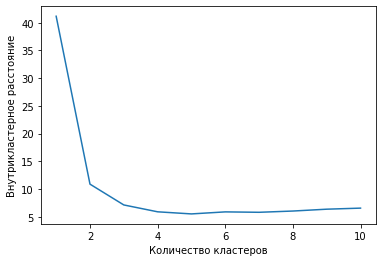

In [58]:
plt.plot(n_clusters, errors)
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')